# Support Vector Machines
Experiment freely. This is a hands-on (brains off!) experience!

In [1]:
options(warn = -1)
source('src/lib.R')

In [2]:
df = get_partitioned_df()
info = getModelInfo()
data_name = 'spirals'

___

As we said, a SVM tries finding the best separating hyperplane in a d-dimensional kernel space.

Quite naively, a properly trained SVM model draws a good separating line between points of different classes.

The equation of the separating hyperplane can be written as:

$$f(x) = \beta_0 +  \sum_{i \in S}\alpha_iK(x_i, x_{i'})$$

in general, given the unlabelled observation *$x_{test}$*, if $f(x_{test}) > 0$, then $x_{test}$ will be classified to the first class, and vice versa.

where:

* $S$ is the number of support vectors (i.e. points in the d-dimensional hyperspace)

* $\beta_0$ is the *offset* parameter ( = 0 in the implementation of the *svmPoly* $\texttt{R}$ function)

* $\alpha_i$ is the *scale* parameter 

We start out with the the **polynomial kernel**:

* $K(x_i, x_{i'}) = (1+\sum_{j=1}^{p}x_{ij}x_{i'j})^d$ is the *polynomial kernel* (and *p* is the number of support vectors)


\* food for though: what are the similarities with the KNN kernel function? what the differences?

___

In [3]:
## choose the algorithm

algorithm = 'svmPoly'

info[[algorithm]]$parameters

parameter,class,label
degree,numeric,Polynomial Degree
scale,numeric,Scale
C,numeric,Cost


In [4]:
## set the hyperparameters

degree = 1
scale = 1
cost = 1

hyperparameters = data.frame('degree' = degree,
                             'scale' = scale,
                             'C' = cost)

- *degree* is the **order** of the polynomial transofmation

- *scale* is a **weighting** parameter affecting the kernel function

- *C* is the **cost** parameter: the higher it is, the lower is the tolerance for points on the wrong side of the separating hyperplane. Remember hard/soft margins? Well, *C* is the hyperparameter that manages the tradeoff between variance (ability to properly deal with outliers) and bias in the final model (ability to correctly discriminate between classes). If set too high, it may result in overfitting the data, hence into bad predictions.

<img src="fig/cost_parameter_svm.PNG" width="400"> 

*Source: [James et al., An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) *

___

In [5]:
## train the model

model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           tuneGrid = hyperparameters,
           trControl = trainControl(method = 'boot',
                                    classProbs =  TRUE)
           )

maximum number of iterations reached 0.0001282154 -0.0001281995maximum number of iterations reached -0.0001501508 0.0001501497

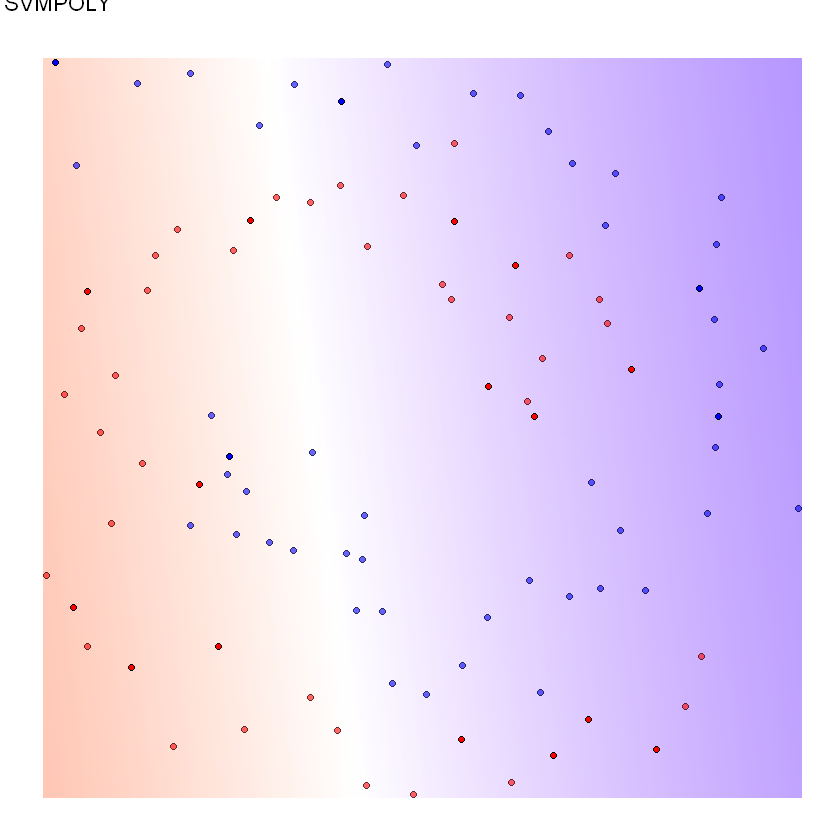

In [6]:
plot_model(df, data_name, model)

Pretty bad, don't you think? This is because we imposed a 1-degree polynomial kernel (which is actually a linear kernel, while the data are clearly not linearly separable). With this approach, the SVM degenerates to a simpler Support Vector *Classifier*, which ofc is much less powerful as it does not explore higher dimensional spaces to find the separating hyperplane. 

___

### Tweak SVM Hyperparameters

Let's profit of the *kernel trick* and try changing some hyperparatemers.

In [7]:
## set the hyperparameters

degree = 3
scale = 1
cost = 1

hyperparameters = data.frame('degree' = degree,
                             'scale' = scale,
                             'C' = cost)

In [8]:
## train the model

model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           tuneGrid = hyperparameters,
           trControl = trainControl(method = 'boot',
                                    classProbs =  TRUE)
           )

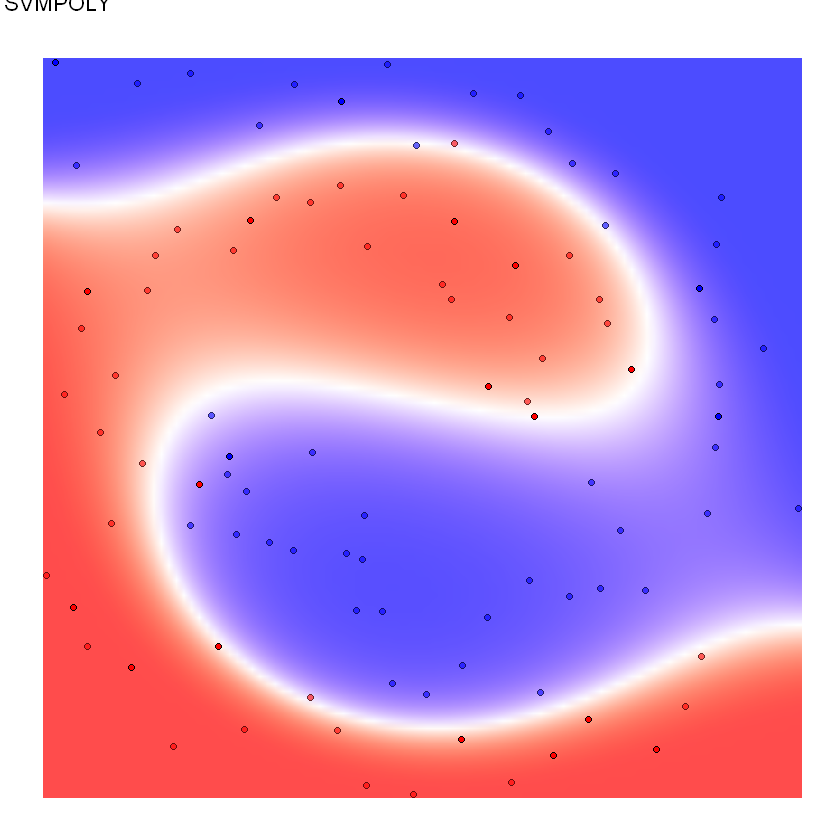

In [9]:
plot_model(df, data_name, model)

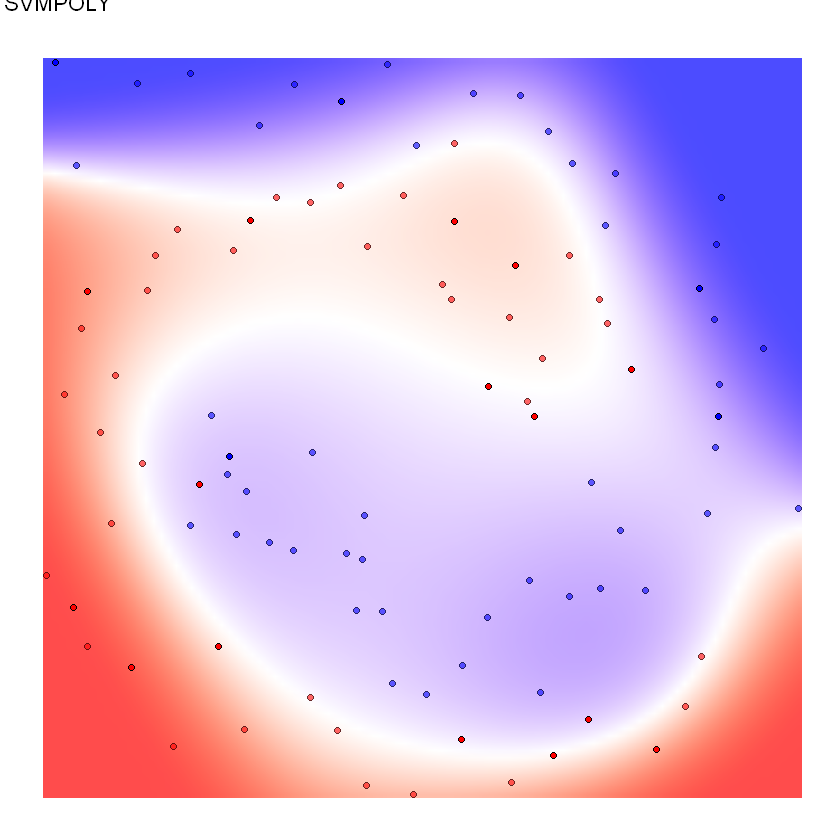

In [10]:
## set the hyperparameters

degree = 5
scale = 1
cost = 5

hyperparameters = data.frame('degree' = degree,
                             'scale' = scale,
                             'C' = cost)

## train the model

model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           tuneGrid = hyperparameters,
           trControl = trainControl(method = 'boot',
                                    classProbs =  TRUE)
           )

plot_model(df, data_name, model)

This lools like quite a bit overfit...

___

Now change kernel type and go for a **radial kernel**:

$$K(x_i, x_{i'}) = \exp\big(-\gamma \sum_{j=1}^{p}(x_{ij}-x_{i'j})^2\big)$$

where:

* $\gamma = \frac{1}{\sqrt{2\sigma}}$ is the *scale* parameter, which set the speed of the exponential decay
* Oh, this looks is suspiciously similar to the gaussian kernel in the kernelized KNN example...

In [11]:
algorithm = 'svmRadial'

info[[algorithm]]$parameters

parameter,class,label
sigma,numeric,Sigma
C,numeric,Cost


Cost has the same interpretation as of above.

In [12]:
model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           trControl = trainControl(method = 'boot',
                                    classProbs =  TRUE)
           )

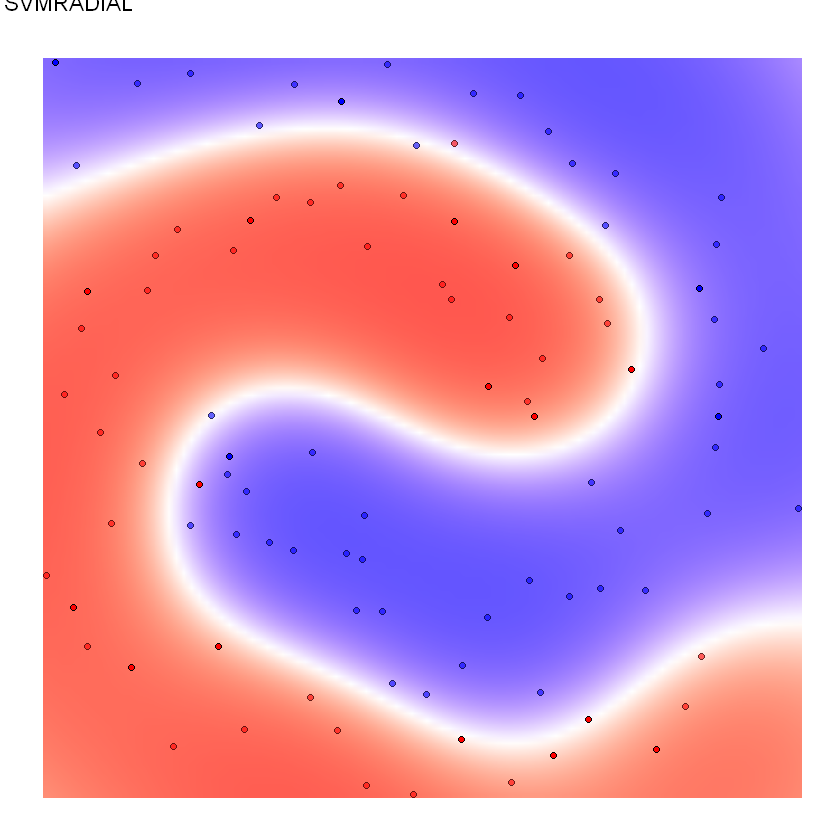

In [13]:
plot_model(df, data_name, model)